POSTTEST 6 

NAMA : MILLANIA ZAHROH

NIM : 2009106140

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import sklearn.datasets as skdt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import OneHotEncoder 
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, complete
from sklearn.cluster import AgglomerativeClustering

In [81]:
df = pd.read_csv('SpotifyBTS.csv')
df.head()

,Unnamed: 0,Title,Artist,Release,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,1,Like,BTS,2013/6/12,0.582,0.726,0,-4.174,0,0.1160,0.27100,0.000000,0.227,0.768,100.450,1HQHuPpr2s2z3VIBTLtUmv,231883
1,2,No More Dream,BTS,2013/6/12,0.436,0.869,2,-5.174,1,0.4720,0.01240,0.000002,0.494,0.612,167.766,4frlkLwlnm58ejpNwWjxyl,221593
2,3,We Are Bulletproof Pt.2,BTS,2013/6/12,0.754,0.952,8,-5.110,0,0.1530,0.00945,0.000006,0.189,0.868,144.051,2Kspa0jD2MSkaEdonf4Cnb,225360
3,4,Attack on Bangtan,BTS,2013/9/11,0.722,0.961,11,-2.548,0,0.2670,0.20300,0.000000,0.121,0.678,118.016,6bCoSWW1zyQrwQDSMEmsVy,247160
4,5,Coffee,BTS,2013/9/11,0.652,0.794,0,-6.604,1,0.0957,0.00808,0.000000,0.298,0.545,92.045,0Tb8sBQ9fseZbDRzRSxTdi,261453


In [82]:
df.keys()

Index(['Unnamed: 0', 'Title', 'Artist', 'Release', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'id',
       'duration_ms'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        147 non-null    int64  
 1   Title             147 non-null    object 
 2   Artist            147 non-null    object 
 3   Release           147 non-null    object 
 4   danceability      147 non-null    float64
 5   energy            147 non-null    float64
 6   key               147 non-null    int64  
 7   loudness          147 non-null    float64
 8   mode              147 non-null    int64  
 9   speechiness       147 non-null    float64
 10  acousticness      147 non-null    float64
 11  instrumentalness  147 non-null    float64
 12  liveness          147 non-null    float64
 13  valence           147 non-null    float64
 14  tempo             147 non-null    float64
 15  id                147 non-null    object 
 16  duration_ms       147 non-null    int64  
dt

In [84]:
df.isna().sum()

Unnamed: 0          0
Title               0
Artist              0
Release             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
id                  0
duration_ms         0
dtype: int64

In [85]:
print(f'panjang dataset {len(df)} baris')

panjang dataset 147 baris


In [86]:
data = df[['mode']]
label = df['Artist']

data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=.3)

In [87]:
print(f'panjang data training {len(data_train)}',
     f'panjang label training {len(label_train)}',
     f'panjang data testing {len(data_test)}',
     f'panjang label testing {len(label_test)}',
     sep='\n')

panjang data training 102
panjang label training 102
panjang data testing 45
panjang label testing 45


In [88]:
dataset_normalisasi = df.copy()
dataset_standarirasi = df.copy()

In [89]:
scaler = MinMaxScaler()

normalize_dataset = scaler.fit_transform(dataset_normalisasi[['key', 'duration_ms']])

normalize_dataset = pd.DataFrame(normalize_dataset)
normalize_dataset.rename(columns={ 0 :'key', 1 : 'duration_ms'}, inplace=True)

normalize_dataset.head()

,key,duration_ms
0,0.000000,0.494748
1,0.181818,0.451513
2,0.727273,0.467340
3,1.000000,0.558937
4,0.000000,0.618992


In [90]:
dataset_standarirasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        147 non-null    int64  
 1   Title             147 non-null    object 
 2   Artist            147 non-null    object 
 3   Release           147 non-null    object 
 4   danceability      147 non-null    float64
 5   energy            147 non-null    float64
 6   key               147 non-null    int64  
 7   loudness          147 non-null    float64
 8   mode              147 non-null    int64  
 9   speechiness       147 non-null    float64
 10  acousticness      147 non-null    float64
 11  instrumentalness  147 non-null    float64
 12  liveness          147 non-null    float64
 13  valence           147 non-null    float64
 14  tempo             147 non-null    float64
 15  id                147 non-null    object 
 16  duration_ms       147 non-null    int64  
dt

In [91]:
dataset_standarirasi.drop('Title', axis = 1, inplace= True)

In [92]:
dataset_standarirasi.drop('Artist', axis = 1, inplace= True)

In [93]:
dataset_standarirasi.drop('Release', axis = 1, inplace= True)

In [94]:
dataset_standarirasi.drop('id', axis = 1, inplace= True)

In [95]:
dataset_standarirasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        147 non-null    int64  
 1   danceability      147 non-null    float64
 2   energy            147 non-null    float64
 3   key               147 non-null    int64  
 4   loudness          147 non-null    float64
 5   mode              147 non-null    int64  
 6   speechiness       147 non-null    float64
 7   acousticness      147 non-null    float64
 8   instrumentalness  147 non-null    float64
 9   liveness          147 non-null    float64
 10  valence           147 non-null    float64
 11  tempo             147 non-null    float64
 12  duration_ms       147 non-null    int64  
dtypes: float64(9), int64(4)
memory usage: 15.1 KB


In [96]:
standart_std = StandardScaler()

scaled_data = standart_std.fit_transform(dataset_standarirasi)

print('Dataset sebelum scalling:',  # SEBELUM
      f'Nilai standar deviasi:\n{np.std(dataset_standarirasi)}',
      sep='\n', end='\n\n')

print('Dataset setelah scalling:',  # SESUDAH
      scaled_data[:6],
      f'Nilai standar deviasi: {np.std(scaled_data)}',
      sep='\n')

Dataset sebelum scalling:
Nilai standar deviasi:
Unnamed: 0             42.434263
danceability            0.107521
energy                  0.139148
key                     3.584498
loudness                1.663766
mode                    0.496645
speechiness             0.118872
acousticness            0.136852
instrumentalness        0.000266
liveness                0.146885
valence                 0.188679
tempo                  27.596832
duration_ms         33768.018914
dtype: float64

Dataset setelah scalling:
[[-1.72030795 -0.38777556 -0.27993547 -1.53343598  0.32992939 -1.12318229
  -0.09028195  1.24599426 -0.14716992  0.23376124  1.19859507 -0.75618929
   0.00383549]
 [-1.69674209 -1.74565435  0.7477494  -0.97547784 -0.27111681  0.89032743
   2.90454258 -0.64363672 -0.14115282  2.05150798  0.37179378  1.68307622
  -0.3008907 ]
 [-1.67317623  1.21191726  1.34423782  0.69839659 -0.23264986 -1.12318229
   0.2209779  -0.66519283 -0.12359039 -0.02494429  1.7285959   0.82373845
  -0.1

In [97]:
dataset_ns = df.copy()

In [98]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_modus = SimpleImputer(strategy='most_frequent')

In [99]:
df.isna().sum()

Unnamed: 0          0
Title               0
Artist              0
Release             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
id                  0
duration_ms         0
dtype: int64

In [100]:
dfmodus = df.copy()

In [101]:
dfmodus['Artist'] = imputer_modus.fit_transform(dfmodus[['Artist']])
dfmodus.isna().sum()

Unnamed: 0          0
Title               0
Artist              0
Release             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
id                  0
duration_ms         0
dtype: int64

In [102]:
df2 = pd.read_csv('Copy.csv')
df2.head()
dataset_duplicate = df2.copy()

dataset_duplicate.duplicated().sum()

0

In [103]:
dataset_duplicate.drop_duplicates(inplace=True)

dataset_duplicate.duplicated().sum()

0

In [104]:
dataset_ordinal = df.copy()
dataset_one_hot = df.copy()

In [105]:
df['Artist'].unique()

array(['BTS', 'BTS, Nichi Minaj', 'BTS, Steve Aoki', 'Steve Aoki, BTS',
       'BTS, Halsey', 'BTS, Charli XCX', 'BTS, Zara Larsson',
       'Lil Nas X, RM, BTS', 'BTS, Lauv', 'BTS, Sia',
       'Jawsh 685, Jason Derulo, BTS', 'BTS, Megan Thee Stallion',
       'Coldplay, BTS', 'Coldplay, BTS, SUGA', 'Coldplay, BTS, Galantis'],
      dtype=object)

In [106]:
encoder_ordinal =OrdinalEncoder()

#encoding kan
dataset_ordinal['Artist'] = encoder_ordinal.fit_transform(dataset_ordinal[['Artist']]).astype('int64')

#lihat
dataset_ordinal.head()

,Unnamed: 0,Title,Artist,Release,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,1,Like,0,2013/6/12,0.582,0.726,0,-4.174,0,0.1160,0.27100,0.000000,0.227,0.768,100.450,1HQHuPpr2s2z3VIBTLtUmv,231883
1,2,No More Dream,0,2013/6/12,0.436,0.869,2,-5.174,1,0.4720,0.01240,0.000002,0.494,0.612,167.766,4frlkLwlnm58ejpNwWjxyl,221593
2,3,We Are Bulletproof Pt.2,0,2013/6/12,0.754,0.952,8,-5.110,0,0.1530,0.00945,0.000006,0.189,0.868,144.051,2Kspa0jD2MSkaEdonf4Cnb,225360
3,4,Attack on Bangtan,0,2013/9/11,0.722,0.961,11,-2.548,0,0.2670,0.20300,0.000000,0.121,0.678,118.016,6bCoSWW1zyQrwQDSMEmsVy,247160
4,5,Coffee,0,2013/9/11,0.652,0.794,0,-6.604,1,0.0957,0.00808,0.000000,0.298,0.545,92.045,0Tb8sBQ9fseZbDRzRSxTdi,261453


In [107]:
dataset_ordinal['Artist'].unique()

array([ 0,  5,  7, 14,  2,  1,  8, 13,  3,  6, 12,  4,  9, 11, 10],
      dtype=int64)

In [108]:
temp_dataset = pd.get_dummies(dataset_one_hot[['Artist']])

temp_dataset = pd.DataFrame(temp_dataset)

dataset_one_hot.drop('Artist', axis=1, inplace=True)

dataset_one_hot = dataset_one_hot.join(temp_dataset)
dataset_one_hot.head(5)

,Unnamed: 0,Title,Release,danceability,energy,key,loudness,mode,speechiness,acousticness,...,"Artist_BTS, Nichi Minaj","Artist_BTS, Sia","Artist_BTS, Steve Aoki","Artist_BTS, Zara Larsson","Artist_Coldplay, BTS","Artist_Coldplay, BTS, Galantis","Artist_Coldplay, BTS, SUGA","Artist_Jawsh 685, Jason Derulo, BTS","Artist_Lil Nas X, RM, BTS","Artist_Steve Aoki, BTS"
0,1,Like,2013/6/12,0.582,0.726,0,-4.174,0,0.1160,0.27100,...,0,0,0,0,0,0,0,0,0,0
1,2,No More Dream,2013/6/12,0.436,0.869,2,-5.174,1,0.4720,0.01240,...,0,0,0,0,0,0,0,0,0,0
2,3,We Are Bulletproof Pt.2,2013/6/12,0.754,0.952,8,-5.110,0,0.1530,0.00945,...,0,0,0,0,0,0,0,0,0,0
3,4,Attack on Bangtan,2013/9/11,0.722,0.961,11,-2.548,0,0.2670,0.20300,...,0,0,0,0,0,0,0,0,0,0
4,5,Coffee,2013/9/11,0.652,0.794,0,-6.604,1,0.0957,0.00808,...,0,0,0,0,0,0,0,0,0,0


In [109]:
dataset =pd.read_csv('SpotifyBTS.csv')
dataset.head()

,Unnamed: 0,Title,Artist,Release,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,1,Like,BTS,2013/6/12,0.582,0.726,0,-4.174,0,0.1160,0.27100,0.000000,0.227,0.768,100.450,1HQHuPpr2s2z3VIBTLtUmv,231883
1,2,No More Dream,BTS,2013/6/12,0.436,0.869,2,-5.174,1,0.4720,0.01240,0.000002,0.494,0.612,167.766,4frlkLwlnm58ejpNwWjxyl,221593
2,3,We Are Bulletproof Pt.2,BTS,2013/6/12,0.754,0.952,8,-5.110,0,0.1530,0.00945,0.000006,0.189,0.868,144.051,2Kspa0jD2MSkaEdonf4Cnb,225360
3,4,Attack on Bangtan,BTS,2013/9/11,0.722,0.961,11,-2.548,0,0.2670,0.20300,0.000000,0.121,0.678,118.016,6bCoSWW1zyQrwQDSMEmsVy,247160
4,5,Coffee,BTS,2013/9/11,0.652,0.794,0,-6.604,1,0.0957,0.00808,0.000000,0.298,0.545,92.045,0Tb8sBQ9fseZbDRzRSxTdi,261453


In [110]:
points_linkage = dataset.iloc[:,[2,3]].values
points_complete = dataset.iloc[:,[2,3]].values

In [111]:
linkage_hr = linkage(points_linkage, method ='ward')
complete_hr = complete(points_complete)

ValueError: could not convert string to float: 'BTS'

In [112]:
plt.figure(1, figsize=(14, 7))
dendrogram(linkage_hr)
plt.title('Dendrogram Linkage')
plt.xlabel('data')
plt.ylabel('distance')

plt.figure(2, figsize=(14, 7))
dendrogram(complete_hr)
plt.title('Dendrogram Complete')
plt.xlabel('data')
plt.ylabel('distance')

plt.show()

NameError: name 'linkage_hr' is not defined

<Figure size 1400x700 with 0 Axes>

In [113]:
agglo_linkage = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agglo_complete = AgglomerativeClustering(n_clusters=3, affinity='euclidean')

In [114]:
pr_linkage = agglo_linkage.fit_predict(points_linkage)
pr_complete = agglo_complete.fit_predict(points_complete)

ValueError: could not convert string to float: 'BTS'

In [115]:
plt.figure(1, figsize=(7,7))
plt.scatter(points_linkage[pr_linkage==0,0], points_linkage[pr_linkage==0,1], 
           s=30, c='red')
plt.scatter(points_linkage[pr_linkage==1,0], points_linkage[pr_linkage==1,1], 
           s=30, c='blue')
plt.scatter(points_linkage[pr_linkage==2,0], points_linkage[pr_linkage==2,1], 
           s=30, c='green')

plt.figure(2, figsize=(7,7))
plt.scatter(points_complete[pr_linkage==0,0], points_complete[pr_linkage==0,1], 
           s=30, c='red')
plt.scatter(points_complete[pr_linkage==1,0], points_complete[pr_linkage==1,1], 
           s=30, c='blue')
plt.scatter(points_complete[pr_linkage==2,0], points_complete[pr_linkage==2,1], 
           s=30, c='green')

plt.show()

NameError: name 'pr_linkage' is not defined

<Figure size 700x700 with 0 Axes>

In [116]:
points_linkage[pr_linkage==0,0]

NameError: name 'pr_linkage' is not defined

In [117]:
bt_array = pd.read_csv('SpotifyBTS.csv')
type(bt_array)

pandas.core.frame.DataFrame

In [118]:
df_bt = pd.read_csv('SpotifyBTS.csv')
df_bt.head(5)

,Unnamed: 0,Title,Artist,Release,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,1,Like,BTS,2013/6/12,0.582,0.726,0,-4.174,0,0.1160,0.27100,0.000000,0.227,0.768,100.450,1HQHuPpr2s2z3VIBTLtUmv,231883
1,2,No More Dream,BTS,2013/6/12,0.436,0.869,2,-5.174,1,0.4720,0.01240,0.000002,0.494,0.612,167.766,4frlkLwlnm58ejpNwWjxyl,221593
2,3,We Are Bulletproof Pt.2,BTS,2013/6/12,0.754,0.952,8,-5.110,0,0.1530,0.00945,0.000006,0.189,0.868,144.051,2Kspa0jD2MSkaEdonf4Cnb,225360
3,4,Attack on Bangtan,BTS,2013/9/11,0.722,0.961,11,-2.548,0,0.2670,0.20300,0.000000,0.121,0.678,118.016,6bCoSWW1zyQrwQDSMEmsVy,247160
4,5,Coffee,BTS,2013/9/11,0.652,0.794,0,-6.604,1,0.0957,0.00808,0.000000,0.298,0.545,92.045,0Tb8sBQ9fseZbDRzRSxTdi,261453


In [135]:
points = df_bt[['key', 'mode']]

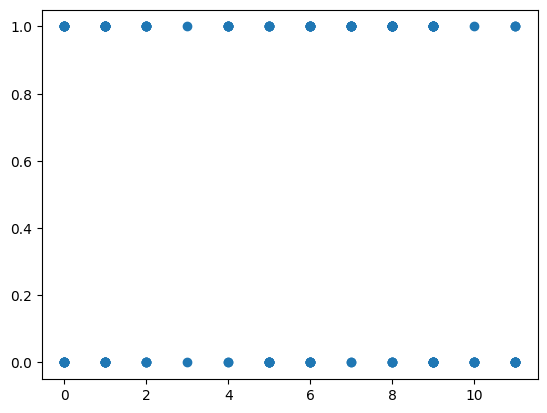

In [136]:
plt.scatter(points['key'], points['mode'])
plt.show()

In [137]:
from sklearn.cluster import KMeans

In [138]:
model = KMeans(n_clusters=2 )

In [139]:
model.fit(points)

KMeans(n_clusters=2)

In [140]:
labels = model.labels_

In [141]:
labels

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [142]:
centroid = model.cluster_centers_

In [143]:
centroid

array([[7.94565217, 0.54347826],
       [1.4       , 0.58181818]])

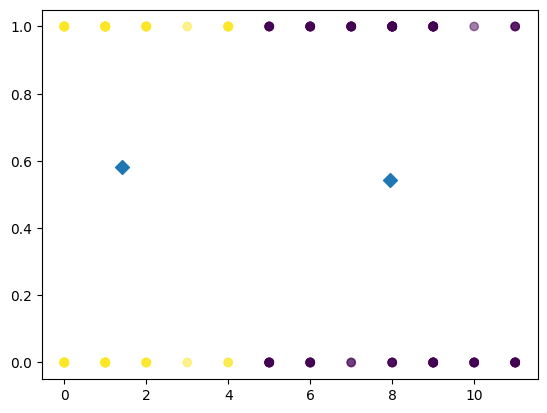

In [144]:
plt.scatter(points['key'], points['mode'], alpha=.5, c=labels)
plt.scatter(centroid[:,0], centroid[:,1], marker='D', s=50)
plt.show()

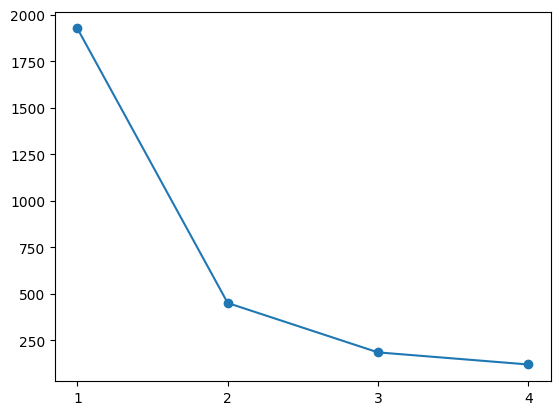

In [145]:
cluster_sum = range(1,5)
inertia =[]

for cluster in cluster_sum:
    model = KMeans(n_clusters=cluster)
    model.fit(points)
    inertia.append(model.inertia_)
    
plt.plot(cluster_sum, inertia, '-o')
plt.xticks(cluster_sum)
plt.show()

In [146]:
bt_array.head(5)

,Unnamed: 0,Title,Artist,Release,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,1,Like,BTS,2013/6/12,0.582,0.726,0,-4.174,0,0.1160,0.27100,0.000000,0.227,0.768,100.450,1HQHuPpr2s2z3VIBTLtUmv,231883
1,2,No More Dream,BTS,2013/6/12,0.436,0.869,2,-5.174,1,0.4720,0.01240,0.000002,0.494,0.612,167.766,4frlkLwlnm58ejpNwWjxyl,221593
2,3,We Are Bulletproof Pt.2,BTS,2013/6/12,0.754,0.952,8,-5.110,0,0.1530,0.00945,0.000006,0.189,0.868,144.051,2Kspa0jD2MSkaEdonf4Cnb,225360
3,4,Attack on Bangtan,BTS,2013/9/11,0.722,0.961,11,-2.548,0,0.2670,0.20300,0.000000,0.121,0.678,118.016,6bCoSWW1zyQrwQDSMEmsVy,247160
4,5,Coffee,BTS,2013/9/11,0.652,0.794,0,-6.604,1,0.0957,0.00808,0.000000,0.298,0.545,92.045,0Tb8sBQ9fseZbDRzRSxTdi,261453
